In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate


In [3]:
data_1=np.loadtxt("Data//G7//Cytochrome.txt", comments="#", unpack=False, skiprows=13)

5015021.2


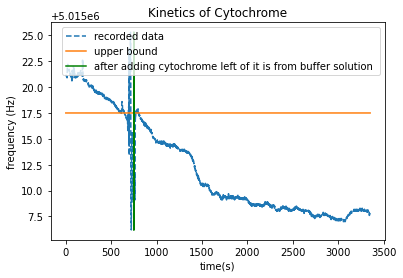

In [4]:
frequency=data_1[:, 0]
time=data_1[:, 5]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
freq_cons_u=[5015017.5 for i in range(len(frequency))] #17.5+5.015*e^6 #21+5.015*e^6
freq_cons_l=[5015006.5 for i in range(len(frequency))] #6.5+5.015*e^6
time_cons_v=[750 for i in range(len(frequency))]

plt.plot(time,freq_cons_u,label='upper bound ')
plt.plot(time_cons_v,frequency,'g',label='after adding cytochrome left of it is from buffer solution ')
plt.legend(loc='best')
plt.title('Kinetics of Cytochrome')
                              
print(frequency[0])    

Text(0.5, 1.0, 'Kinetics of Cytochrome')

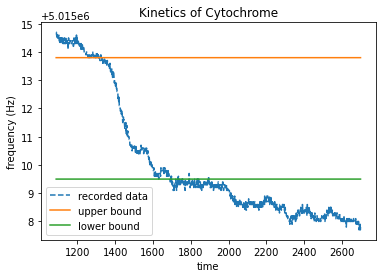

In [5]:
frequency=data_1[1000:2500, 0]
time=data_1[1000:2500, 5]
freq_cons_u=[5015013.8 for i in range(len(frequency))] #13.8+5.015*e^6
freq_cons_l=[5015009.5 for i in range(len(frequency))]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.plot(time,freq_cons_u,label='upper bound')
plt.plot(time,freq_cons_l,label='lower bound')
plt.xlabel('time')
plt.ylabel('frequency (Hz)')
plt.legend(loc='best')
plt.title('Kinetics of Cytochrome')

In [6]:
data_2=np.loadtxt("Data//G7_EC//cycCV.ocw", comments="#", unpack=False, skiprows=2)

328


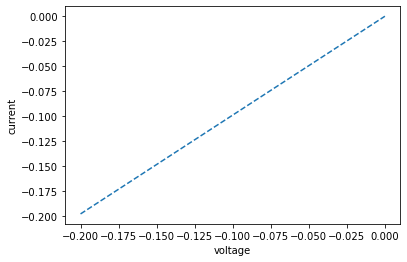

In [7]:
voltage=data_2[0] 
current=data_2[1]
# print(voltage)
# print(current)
# print(data_2)
plt.plot(voltage,current,linestyle='dashed')
plt.xlabel('voltage')
plt.ylabel('current')
print(len(data_2))

Text(0.5, 1.0, 'Plot of Cyclic Voltameter Data')

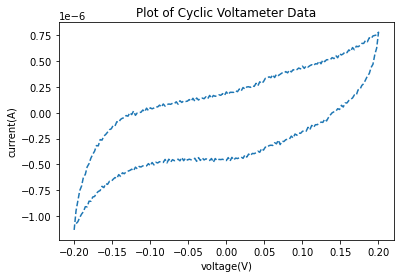

In [8]:
voltage=data_2[:, 0] 
current=data_2[:, 1]
#print(data_2)
plt.plot(voltage,current,linestyle='dashed')
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.title('Plot of Cyclic Voltameter Data')

-0.2000427
-1.133728e-06
0.1979065
6.259155e-07


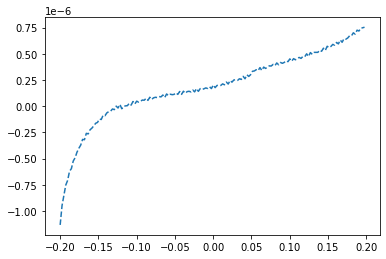

In [9]:
voltage_above=data_2[:164, 0] 
current_above=data_2[:164, 1]
voltage_below=data_2[165:328,0]
current_below=data_2[165:328,1]
#plt.plot(voltage_below,current_below,linestyle='dashed')
plt.plot(voltage_above,current_above,linestyle='dashed')
print(voltage_above[0])
print(current_above[0])
print(voltage_below[0])
print(current_below[0])

In [10]:
# define the true objective function
def objective(voltage_below, a, b):
    return a * voltage_below + b
def objective(voltage_above, c, d):
    return c * voltage_above + d
...
# curve fit
popt_1, _ = curve_fit(objective, voltage_below, current_below)
popt_2, _ = curve_fit(objective, voltage_above, current_above)
# summarize the parameter values
a, b = popt_1
c, d = popt_2
print('y = %.10f * x + %.10f' % (a, b))
print(popt)
plt.plot(voltage_below[10:95],objective(voltage_below[10:95], a, b))
plt.plot(voltage_below,current_below,linestyle='dashed')
#plt.plot(voltage_above[15:95],objective(voltage_above[15:95], c, d)+0.0000005) #+0.0000005
plt.plot(voltage_above[15:95],objective(voltage_above[15:95], c, d))
plt.plot(voltage_above,current_above,linestyle='dashed')
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')

plt.show()

y = 0.0000025643 * x + -0.0000003531


NameError: name 'popt' is not defined

[ 2.56425554e-06 -3.53096410e-07]


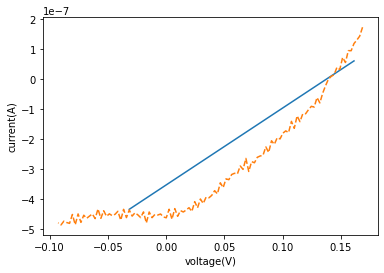

3.6029247362022623e-08

In [11]:
def objective(voltage_below, a, b):
    return a * voltage_below + b
...
# curve fit
popt, _ = curve_fit(objective, voltage_below, current_below)
# summarize the parameter values
a, b = popt
#print('y = %.5f * x + %.5f' % (a, b))
print(popt)
plt.plot(voltage_below[15:95],objective(voltage_below[15:95], a, b))
plt.plot(voltage_below[12:120],current_below[12:120],linestyle='dashed')# in below index moves in reverse
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.show()
integrate.simpson(objective(voltage_below[15:95], a, b),voltage_below[15:95])
# from scipy import integrate






[ 2.56425554e-06 -3.53096410e-07]


2.399219700926714e-10

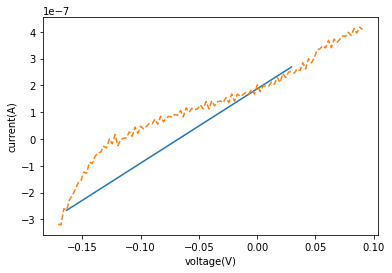

In [12]:
def objective(voltage_above, c, d):
    return c * voltage_above + d
...
# curve fit
popt_2, _ = curve_fit(objective, voltage_above, current_above)
# summarize the parameter values
c, d = popt_2
#print('y = %.5f * x + %.5f' % (a, b))
print(popt)
plt.plot(voltage_above[15:95],objective(voltage_above[15:95], c, d))
plt.plot(voltage_above[12:120],current_above[12:120],linestyle='dashed')
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
integrate.simpson(objective(voltage_above[15:95], c, d),voltage_above[15:95])
# plt.show()

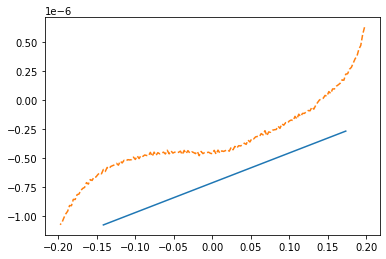

In [13]:
def objective(voltage_below, a, b):
    return a * voltage_below + b
popt_1, _ = curve_fit(objective, voltage_below, current_below)
plt.plot(voltage_below[10:140],objective(voltage_below[10:140], a, b)-0.00000036)
plt.plot(voltage_below,current_below,linestyle='dashed')

In [14]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html
from scipy import integrate
x = np.arange(0, 10)
y = np.arange(0, 10)
integrate.simpson(y, x)

40.5

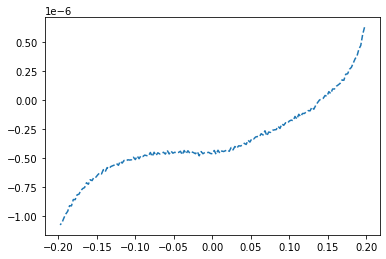

In [15]:
# voltage=data_2[:164, 0] 
# current=data_2[:164, 1]
voltage=data_2[165:328,0]
current=data_2[165:328,1]
plt.plot(voltage,current,linestyle='dashed')

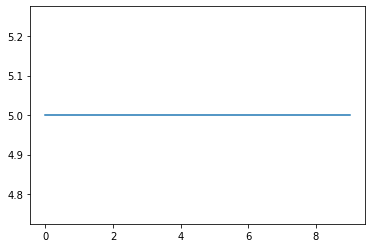

In [16]:
x=[i for i in range (10)]
y=[5 for i in range(10)]
plt.plot(x,y)

In [17]:
data_3=np.loadtxt("Data//G7//MUA 1.txt", comments="#", unpack=False, skiprows=13)
#print(data_2)

5015115.6


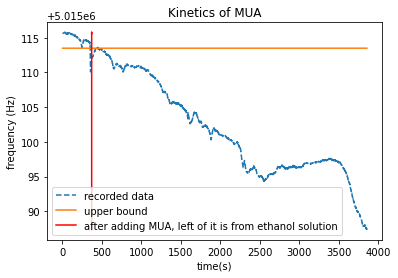

In [18]:
frequency=data_3[:, 0]
time=data_3[:, 5]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
freq_cons_u=[5015113.5 for i in range(len(frequency))] #17.5+5.015*e^6 #21+5.015*e^6 #97
freq_cons_l=[5015097 for i in range(len(frequency))] #6.5+5.015*e^6 #94.5
time_cons_v=[370 for i in range(len(frequency))]

plt.plot(time,freq_cons_u,label='upper bound ')
plt.plot(time_cons_v,frequency,'r',label='after adding MUA, left of it is from ethanol solution')
#plt.plot(time,freq_cons_l,label='lower bound')
plt.legend()#loc='best'
plt.title('Kinetics of MUA')
                              
print(frequency[0])  

In [19]:
50*1e-3

0.05

Text(0.5, 1.0, 'Kinetics of MUA')

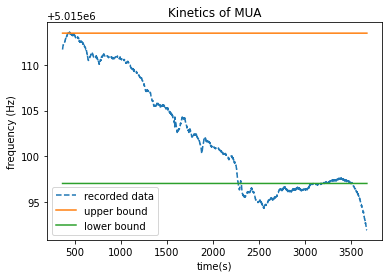

In [20]:
frequency=data_3[320:3400, 0]
time=data_3[320:3400, 5]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
freq_cons_u=[5015113.5 for i in range(len(frequency))] #17.5+5.015*e^6 #21+5.015*e^6 #97
freq_cons_l=[5015094.5 for i in range(len(frequency))] #6.5+5.015*e^6 #94.5
plt.plot(time,freq_cons_u,label='upper bound ')
freq_cons_l=[5015097 for i in range(len(frequency))]
plt.plot(time,freq_cons_l,label='lower bound')
# plt.plot(time_cons_v,frequency,'r',label='after adding MUA, left of it is from air')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
plt.legend(loc='best')
plt.title('Kinetics of MUA')

In [21]:
50*1e-3

0.05

In [22]:
data_4=np.loadtxt("Data//G7//EtOH.txt", comments="#", unpack=False, skiprows=13)
print(len(data_4))

455


5016009.7
[  0.628  45.699  46.778  47.848  48.923  49.999  51.076  52.144  53.219
  54.309  55.387  56.454  57.533  58.613  59.676  60.759  61.834  62.898
  63.976  65.049  66.126  67.197  68.274  69.351  70.424  71.504  72.568
  73.647  74.725  75.793  76.878  77.942  79.025  80.1    81.165  82.243
  83.317  84.393  85.473  86.544  87.617  88.683  89.757  90.839  91.92
  92.984  94.066  95.141  96.218  97.295  98.361  99.44  100.511 101.588
 102.655 103.734 104.81  105.888 106.957 108.036 109.114 110.192 111.262
 112.328 113.41  114.489 115.558 116.631 117.708 118.782 119.86  120.933
 122.005 123.083 124.157 125.233 126.301 127.379 128.447 129.524 130.604
 131.67  132.753 133.819 134.899 135.978 137.057 138.125 139.196 140.273
 141.352 142.435 143.502 144.577 145.657 146.723 147.8   148.877 149.942
 151.017 152.099 153.178 154.253 155.315 156.401 157.467 158.548 159.617
 160.697 161.77  162.848 163.912 164.985 166.062 167.137 168.221 169.287
 170.366 171.432 172.509 173.589 174.653 1

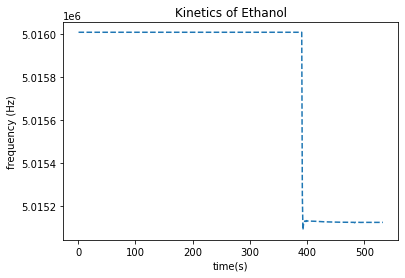

In [23]:
frequency=data_4[:, 0]
time=data_4[:, 5]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
# freq_cons_u=[5015017.5 for i in range(len(frequency))] #17.5+5.015*e^6 #21+5.015*e^6
# freq_cons_l=[5015006.5 for i in range(len(frequency))] #6.5+5.015*e^6
# time_cons_v=[750 for i in range(len(frequency))]

# plt.plot(time,freq_cons_u,label='upper bound ')
# plt.plot(time_cons_v,frequency,'g',label='after adding cytochrome left of it is from buffer solution ')
# plt.legend(loc='best')
plt.title('Kinetics of Ethanol')
                              
print(frequency[0]) 
print((time))

5016009.7


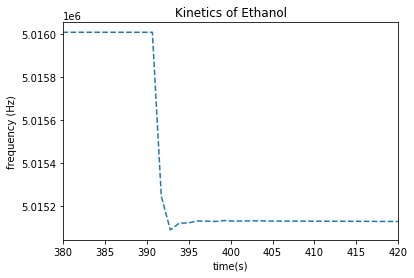

In [24]:
#%matplotlib notebook
%matplotlib inline
frequency=data_4[:, 0]
time=data_4[:, 5]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
plt.xlabel('time(s)')
plt.ylabel('frequency (Hz)')
# freq_cons_u=[5015017.5 for i in range(len(frequency))] #17.5+5.015*e^6 #21+5.015*e^6
# freq_cons_l=[5015006.5 for i in range(len(frequency))] #6.5+5.015*e^6
# time_cons_v=[750 for i in range(len(frequency))]
# plt.xlim((391, 397))
# plt.ylim((5015000,5015300))#5.0154*e^6
plt.xlim((380, 420)) #time range from given data
# plt.ylim((5015000,5015300)
# plt.plot(time,freq_cons_u,label='upper bound ')
# plt.plot(time_cons_v,frequency,'g',label='after adding cytochrome left of it is from buffer solution ')
# plt.legend(loc='best')
plt.title('Kinetics of Ethanol')
                              
print(frequency[0]) 

320


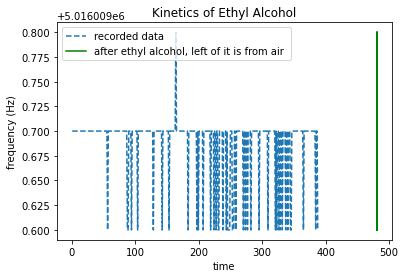

In [25]:
frequency=data_4[0:320, 0]
time=data_4[0:320, 5]
# freq_cons_u=[5015013.8 for i in range(len(frequency))] #13.8+5.015*e^6
# freq_cons_l=[5015009.5 for i in range(len(frequency))]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
# plt.plot(time,freq_cons_u,label='upper bound')
# plt.plot(time,freq_cons_l,label='lower bound')
time_cons_v=[480 for i in range(len(frequency))]
plt.plot(time_cons_v,frequency,'g',label='after ethyl alcohol, left of it is from air ')
plt.xlabel('time')
plt.ylabel('frequency (Hz)')
plt.legend(loc='best')
plt.title('Kinetics of Ethyl Alcohol')
print(len(time))

75


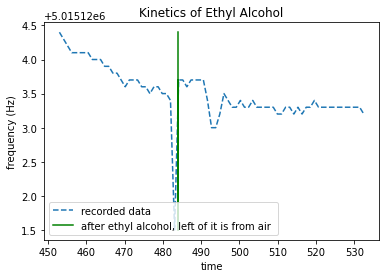

In [26]:
#to ask why scale changes
frequency=data_4[380:455, 0] #index [380:455]
time=data_4[380:455, 5]
# frequency=data_4[480:550, 0]
# time=data_4[480:550, 5]
# freq_cons_u=[5015013.8 for i in range(len(frequency))] #13.8+5.015*e^6
# freq_cons_l=[5015009.5 for i in range(len(frequency))]
plt.plot(time,frequency,label='recorded data',linestyle='dashed')
# plt.plot(time,freq_cons_u,label='upper bound')
# plt.plot(time,freq_cons_l,label='lower bound')
time_cons_v=[484 for i in range(len(frequency))]
plt.plot(time_cons_v,frequency,'g',label='after ethyl alcohol, left of it is from air ')
plt.xlabel('time')
plt.ylabel('frequency (Hz)')
plt.legend(loc='best')
plt.title('Kinetics of Ethyl Alcohol')
print(len(time))

In [27]:
#https://thispointer.com/find-the-index-of-a-value-in-numpy-array/
frequency=data_4[0:410, 0] #index
time=data_4[0:410, 5]
np.mean(frequency) #f0 in air
i = np.where(time==04.841270E+2)
print(i)
print(np.mean(data_4[0:410, 0]))

(array([409], dtype=int64),)
5015822.31195122


In [28]:
frequency=data_4[410:, 0] #index
time=data_4[410:, 5]
print(len(frequency))
np.mean(frequency)

45


5015123.340000001

In [29]:
# frequency=data_1[0:450, 0]
# time=data_1[0:450, 5]
A=[5,6,2,8,5,1]
np.mean(A[0:5])
#np.mean(A)
print(A[0:3])


[5, 6, 2]


In [30]:
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
lst = [15, 9, 55, 41, 35, 20, 62, 49]
average = Average(lst)
  
# Printing average of the list
print("Average of the list =", round(average, 2))
np.mean(lst)

Average of the list = 35.75


35.75